In [88]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.math import confusion_matrix
from imblearn.over_sampling import SMOTE

In [38]:
data_frame = pd.read_csv('/content/Churn_Modelling.csv')
data_frame.drop(['RowNumber', 'CustomerId', 'Surname'], axis='columns', inplace=True)
data_frame.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [39]:
data_frame = pd.get_dummies(data_frame, columns=['Geography', 'Gender'])
data_frame.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [40]:
scaler = StandardScaler()
data_frame['CreditScore'] = scaler.fit_transform(data_frame[['CreditScore']])
data_frame['Age'] = scaler.fit_transform(data_frame[['Age']])
data_frame['Balance'] = scaler.fit_transform(data_frame[['Balance']])
data_frame['EstimatedSalary'] = scaler.fit_transform(data_frame[['EstimatedSalary']])
data_frame.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,2,-1.225848,1,1,1,0.021886,1,1,0,0,1,0
1,-0.440036,0.198164,1,0.117350,1,0,1,0.216534,0,0,0,1,1,0
2,-1.536794,0.293517,8,1.333053,3,1,0,0.240687,1,1,0,0,1,0
3,0.501521,0.007457,1,-1.225848,2,0,0,-0.108918,0,1,0,0,1,0
4,2.063884,0.388871,2,0.785728,1,1,1,-0.365276,0,0,0,1,1,0


In [41]:
X = data_frame.drop('Exited', axis='columns')
y = data_frame['Exited']

# Normal Datasets

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
print(f'Training shapes: {X_train.shape}, {y_train.shape}')
print(f'Testing shapes: {X_test.shape}, {y_test.shape}')

Training shapes: (8000, 13), (8000,)
Testing shapes: (2000, 13), (2000,)


In [44]:
def train_model(X_tr, X_te, Y_tr, Y_te):
  model = Sequential(
    [
        Dense(64, input_shape=(X_train.shape[1], ), activation='relu'),
        Dropout(0.1),
        Dense(32, activation='relu'),
        Dropout(0.1),
        Dense(16, activation='relu'),
        Dropout(0.1),
        Dense(4, activation='relu'),
        Dropout(0.1),
        Dense(2, activation='relu'),
        Dropout(0.1),
        Dense(1, activation='sigmoid')
    ]
  )

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  model.fit(X_tr, Y_tr, epochs=32, verbose=0)
  y_pred = np.round(model.predict(X_te).reshape(-1))
  print(classification_report(Y_te, y_pred))
  cm = confusion_matrix(Y_te, y_pred)
  sn.heatmap(cm, annot=True, fmt='d')

63/63 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1596
           1       0.82      0.38      0.52       404

    accuracy                           0.86      2000
   macro avg       0.84      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000



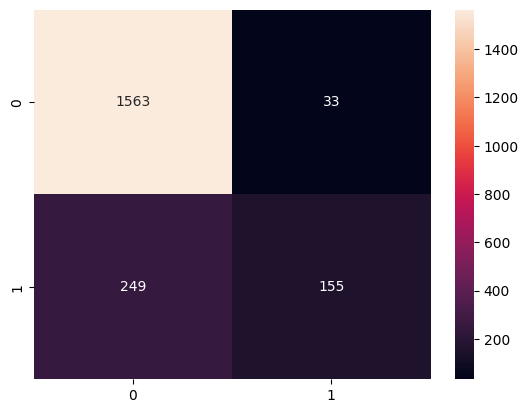

In [45]:
train_model(X_train, X_test, y_train, y_test)

# Undersampling

In [53]:
data_frame['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [54]:
df_under = data_frame[data_frame['Exited'] == 1]
df_under = pd.concat([df_under, data_frame[data_frame['Exited'] == 0].sample(2037)])
df_under['Exited'].value_counts()

1    2037
0    2037
Name: Exited, dtype: int64

In [55]:
X = df_under.drop('Exited', axis='columns')
y = df_under['Exited']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

26/26 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       407
           1       0.82      0.64      0.72       408

    accuracy                           0.75       815
   macro avg       0.76      0.75      0.75       815
weighted avg       0.76      0.75      0.75       815



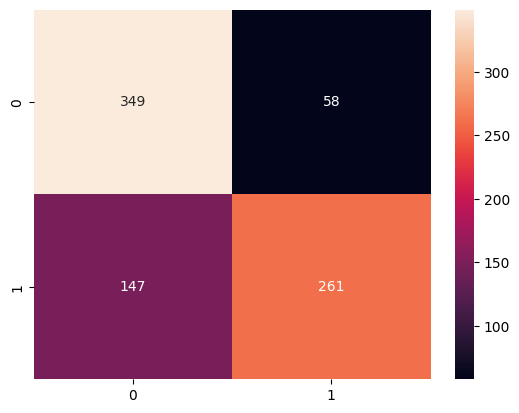

In [57]:
train_model(X_train, X_test, y_train, y_test)

# Oversampling

In [83]:
data_frame['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [84]:
df_over = data_frame[data_frame['Exited'] == 0]
df_over = pd.concat([df_over, data_frame[data_frame['Exited'] == 1].sample(7963, replace=True)])
df_over['Exited'].value_counts()

0    7963
1    7963
Name: Exited, dtype: int64

In [85]:
X = df_over.drop('Exited', axis='columns')
y = df_over['Exited']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [82]:
X_train.shape

(12740, 13)

100/100 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.86      0.69      0.76      1593
           1       0.74      0.89      0.81      1593

    accuracy                           0.79      3186
   macro avg       0.80      0.79      0.78      3186
weighted avg       0.80      0.79      0.78      3186



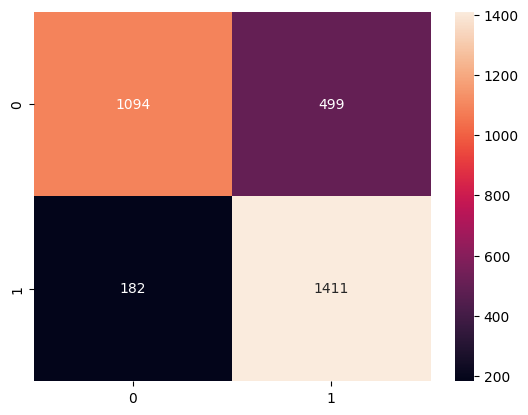

In [87]:
train_model(X_train, X_test, y_train, y_test)

# SMOTE

In [89]:
X = data_frame.drop('Exited', axis='columns')
y = data_frame['Exited']

In [90]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [92]:
smote = SMOTE(sampling_strategy='minority')
X, y = smote.fit_resample(X, y)

In [94]:
y.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

100/100 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1593
           1       0.83      0.86      0.84      1593

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



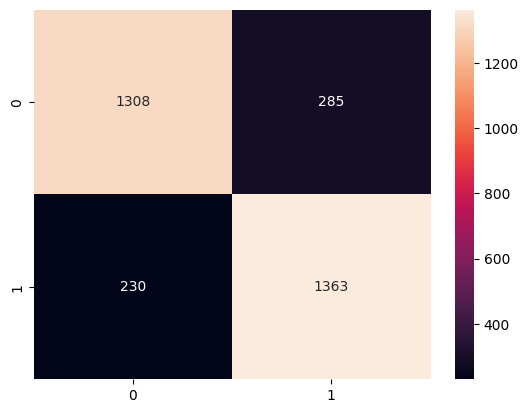

In [96]:
train_model(X_train, X_test, y_train, y_test)